## *set options

In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)
# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

**1. data 폴더의 service_DB.db에 연결한 뒤 데이터베이스 스키마를 출력한 후,  order 테이블 호출.**

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd
import sqlite3

In [4]:
connect = sqlite3.connect('zigzag_DB.db')
connect

In [5]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connect)

print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


order 테이블의 각 행은 주문이 일어난 로그를 나타내며, 2018년 6월 11일 하루치 데이터임.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냄.

**2. order 테이블을 이용해 당일 매출 상위 10개 쇼핑몰 구하기.**

In [6]:
table = pd.pivot_table(order, index = 'shop_id', values = 'price', aggfunc = 'sum')

table.sort_values(by = 'price', ascending = False)
table.head()

,price
shop_id,
1,84600
2,347100
3,143100
4,49000
5,9900


**3. 판매 건수를 포함하여 피벗테이블을 만들고, 상위 10개 쇼핑몰의 매출을 그래프로 보기.**

같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있어 매출과 결제건수를 함께 확인


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
table = pd.pivot_table(order, 
                       index = 'shop_id', 
                       values = 'price',
                       aggfunc = ['sum', 'count'])

table.columns = ['sum', 'count'] #헷갈리니까 아예 컬럼명을 바꿈
table = table.sort_values(by = 'sum', ascending = False)
top_table = table.head(10)
top_table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


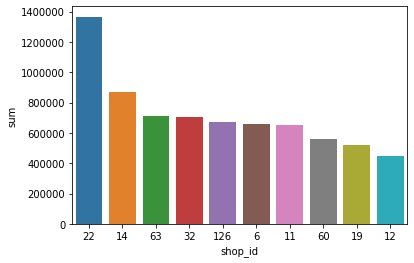

In [9]:
#shop_id가 인덱스로 지정되어있는 상황이므로

# top_table = top_table.reset_index()
# sns.barplot(data=top_table, x='shop_id', y = 'sum', order = 'shop_id') #order 오류남

#아니면 그냥 인덱스로 두고
sns.barplot(data=top_table, x=top_table.index, y = 'sum', order = top_table.index)


**4. 시간대별 매출 구하기.**

In [10]:
order["timestamp"] = pd.to_datetime(order["timestamp"])

In [11]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.

mpl.rc('font', family='Malgun othic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


findfont: Font family ['Malgun othic'] not found. Falling back to DejaVu Sans.


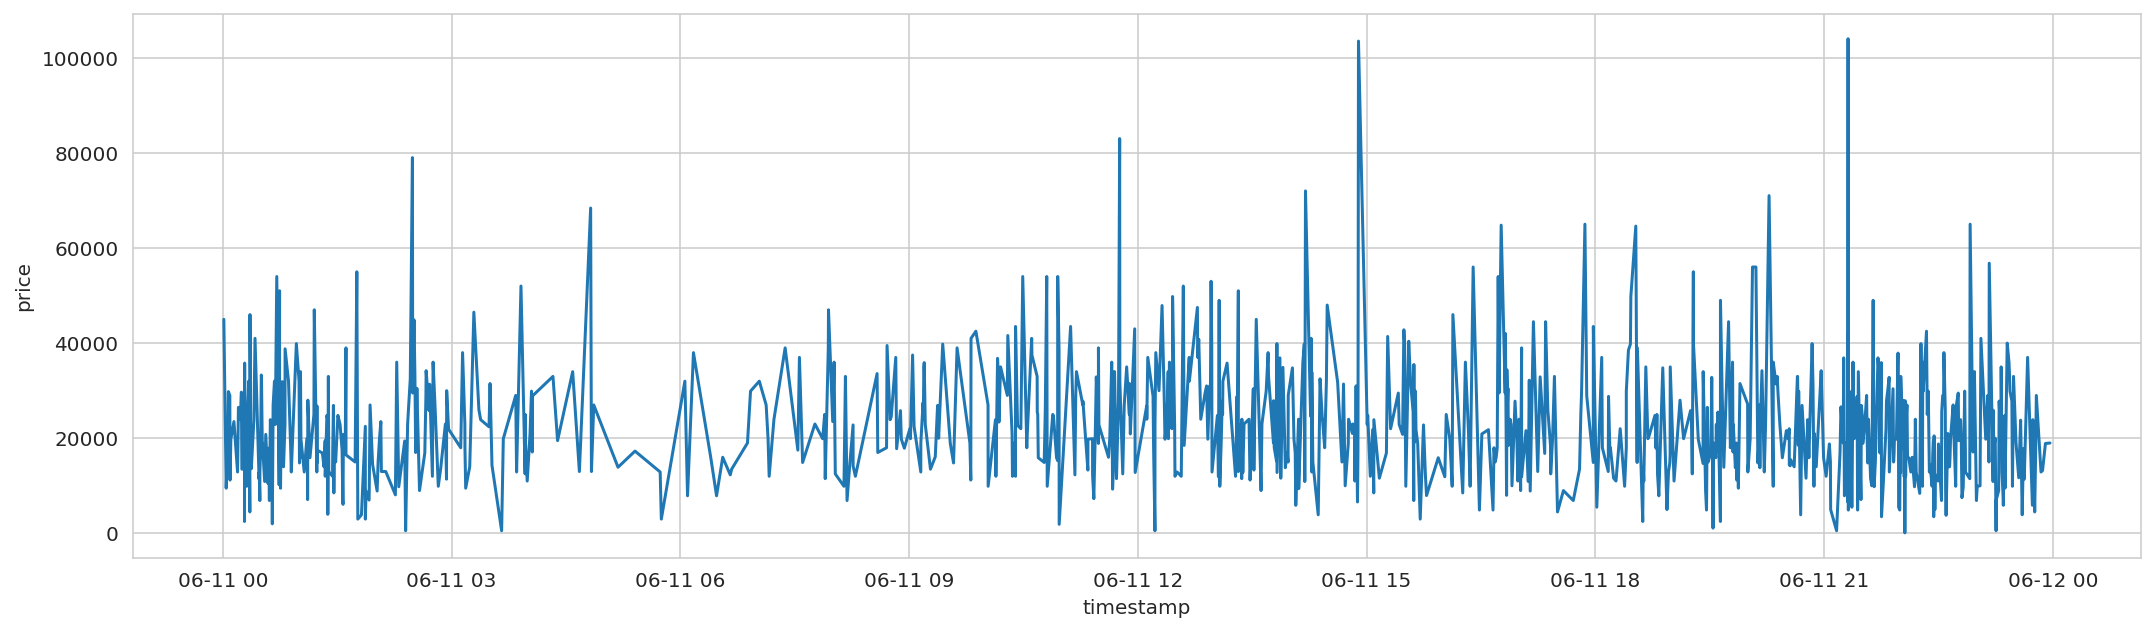

In [12]:
plt.figure(figsize = (18,5))
sns.lineplot(data=order, x='timestamp', y='price')


**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들기**

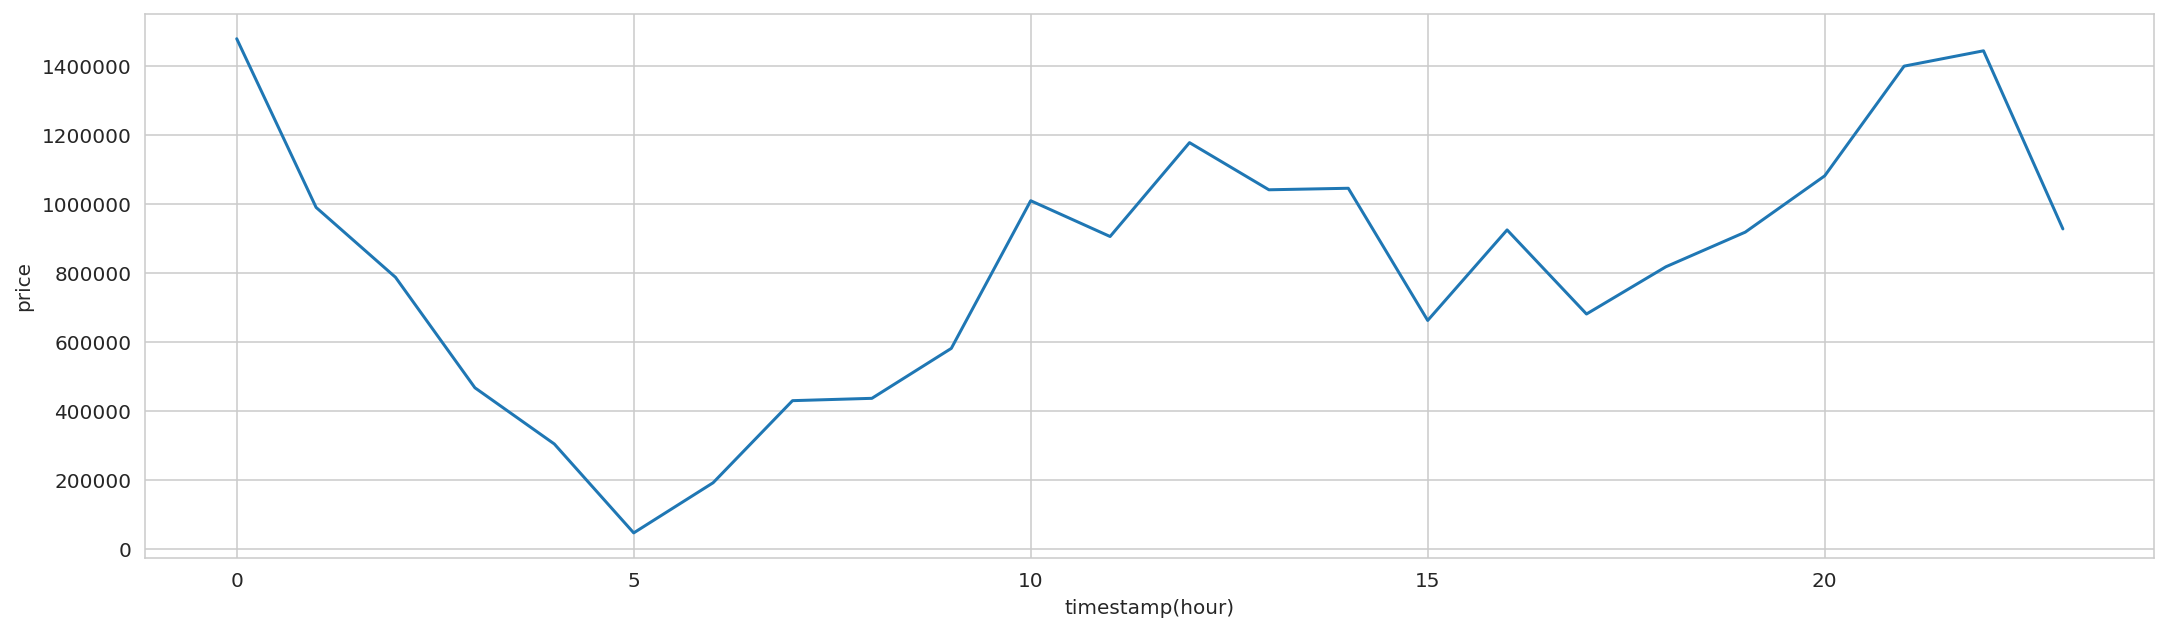

In [14]:
plt.figure(figsize = (18,5))
sns.lineplot(data=table_time, x=table_time.index, y='price')


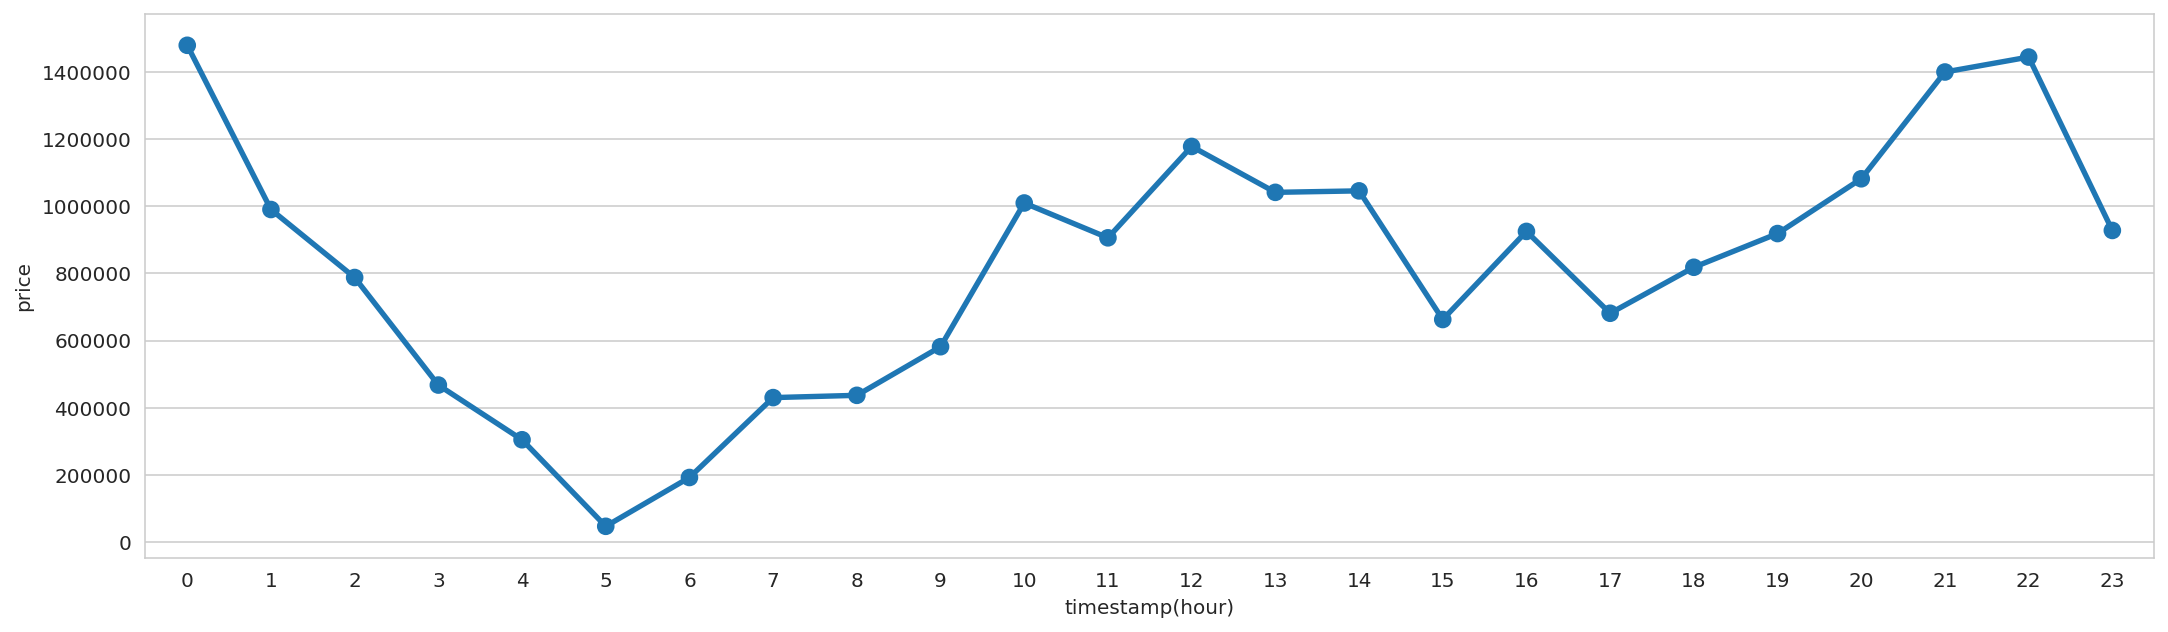

In [15]:
plt.figure(figsize = (18,5))
sns.pointplot(data=table_time, x=table_time.index, y='price')

**6 . user 테이블을 불러와 order 테이블과 병합하기.**

In [16]:
query = "SELECT * FROM 'user'"

user = pd.read_sql(query, connect)

print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [17]:
order.head()

,timestamp,user_id,goods_id,shop_id,price,timestamp(hour)
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0


In [18]:
order_user = pd.merge(order, user, on="user_id", how="inner")
print(order_user.shape)
order_user

(867, 8)


,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17
...,...,...,...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000,23,iOS,15
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900,23,And,19
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23,And,26
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23,iOS,27


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하기.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화를 해야함.

In [19]:
import numpy as np

def find_age(x):
    x = x['age']
    
    if x == -1 : 
        return np.nan
    else :
        return x

order_user['age2'] = order_user.apply(find_age, axis = 'columns')


In [20]:
top_table.head(10)

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [21]:
shop_id_age = pd.merge(top_table, order_user, left_on = top_table.index, right_on = 'shop_id', how = 'left')

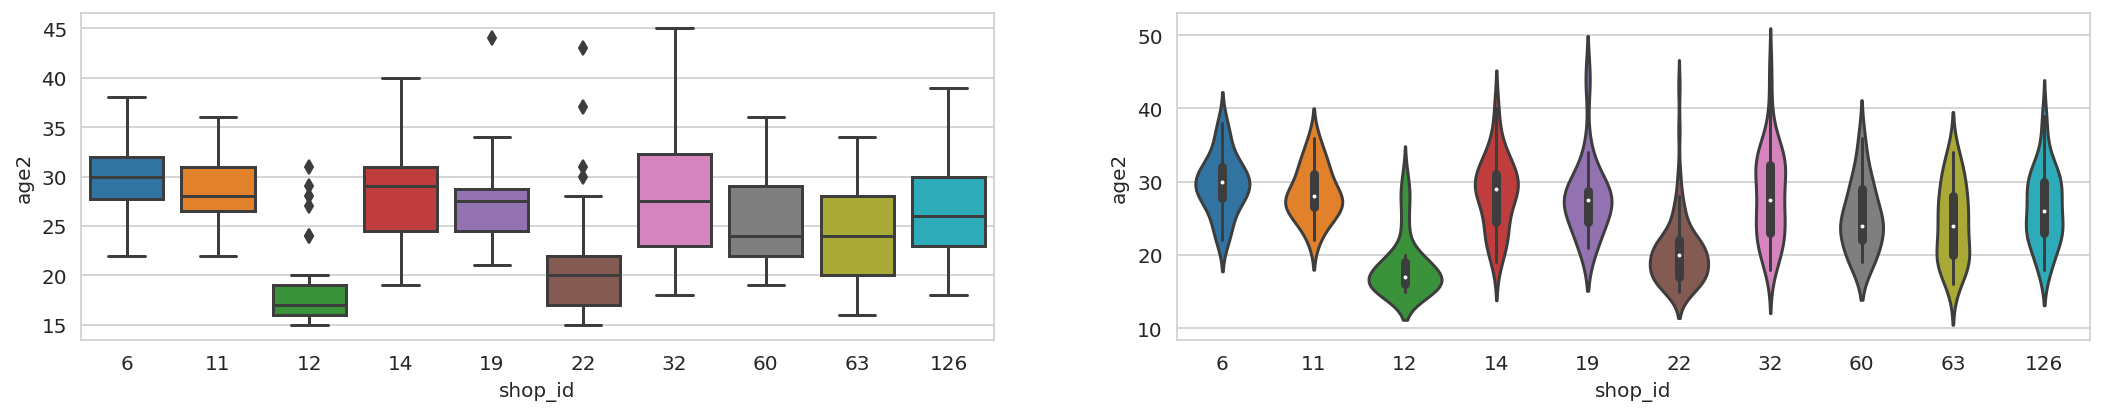

In [22]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

figure.set_size_inches(18, 3)

sns.boxplot(data=shop_id_age, x = 'shop_id', y = 'age2', ax = ax1)
sns.violinplot(data=shop_id_age, x = 'shop_id', y = 'age2', ax = ax2)

**8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증.**

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

In [23]:
def make_generation(age):
    age = age['age']
    
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"


order_user['연령대'] = order_user.apply(make_generation, axis = 'columns')

order_user


,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),os,age,age2,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,39.0,30대 후반
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,17.0,10대
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,NaN,미입력
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,34.0,30대 중반
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,17.0,10대
...,...,...,...,...,...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000,23,iOS,15,15.0,10대
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900,23,And,19,19.0,10대
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23,And,26,26.0,20대 중반
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23,iOS,27,27.0,20대 후반


In [24]:
query = "SELECT * FROM 'shop'"

shop = pd.read_sql(query, connect)

print(shop.shape)
shop.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [25]:
order_user_shop = pd.merge(order_user, shop, on = 'shop_id', how = "left" )

order_user_shop.head()

,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),os,age_x,age2,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,39.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,17.0,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,NaN,미입력,Marlene,의류,20대 초반/20대 중반/20대 후반,유니크/심플베이직
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,34.0,30대 중반,Elayne,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,17.0,10대,Margaret,의류,10대/20대 초반/20대 중반,빈티지/유니크


병합한 테이블을 이용하여 '거래연령 일치여부' 칼럼 만들기. 각 행에 함수를 적용할 때는 `apply(function, axis=1)`을 이용

In [26]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])
    
order_user_shop['거래연령 일치여부'] = order_user_shop.apply(check_generation, axis = 1) 
order_user_shop.head()

,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),os,age_x,age2,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,39.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,17.0,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,True
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,NaN,미입력,Marlene,의류,20대 초반/20대 중반/20대 후반,유니크/심플베이직,True
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,34.0,30대 중반,Elayne,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,17.0,10대,Margaret,의류,10대/20대 초반/20대 중반,빈티지/유니크,True


In [27]:
order_user_shop.loc[order_user_shop['거래연령 일치여부'] == True, '거래연령 일치여부'] = 1
order_user_shop.loc[order_user_shop['거래연령 일치여부'] != True, '거래연령 일치여부'] = 0

table_age = pd.pivot_table(order_user_shop, index = 'shop_id', values = '거래연령 일치여부', aggfunc = ['mean', 'count'])
table_age[table_age.index.isin(top_table.index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있음.

**9. 쇼핑몰의 스타일 태그를 정리하기**

In [28]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [29]:
shop['style1'] = shop['style'].str.split('/').str[0]
shop['style2'] = shop['style'].str.split('/').str[1]

for i in range(len(style_list)):
    new_columns = style_list[i]
    shop[new_columns] = style_list[i]
    
    shop.loc[(shop[new_columns] == shop['style1']) | (shop[new_columns] == shop['style2']), new_columns] = 1
    shop.loc[(shop[new_columns] != True), new_columns] = 0


shop = shop.drop(['style1', 'style2'], axis = 1)

shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [30]:
# def check_style_list(row):
#     row = row['style']
    
#     if '/' in row:
#         word1 = row.str.split('/').str[0]
#         word2 = row.str.split('/').str[1]
#         if word1 in style_list :
#             return True
#         elif word2 in style_list :
#             return True
#         else :
#             return False
#     elif '/' not in row: 
#         if row in style_list:
#             return True
#         else:
#             return False
#     elif 'None' in row:
#         return False
     
              
        
# shop['페미닌'] = shop.apply(check_style_list, axis = 1)
# shop['모던시크'] = shop.apply(check_style_list, axis = 1)
    
# for i in style_list:
#     shop[i] = shop.apply(check_style_list, axis = 1)
    
# shop.head()

**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아주세요. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려주세요.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [31]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 31)


,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iOS,39
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,And,32
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,And,37


In [32]:
table_topstyle = pd.pivot_table(merged, index = 'shop_id', values = style_list, aggfunc = 'sum', margins = True).T

table_topstyle = table_topstyle.sort_values(by = 'All', ascending = False)

table_topstyle.head(3)

shop_id,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,28,29,30,31,32,33,34,36,38,41,42,43,45,46,47,48,52,56,57,59,60,61,63,64,65,67,68,69,70,72,73,74,76,77,78,79,80,82,83,84,85,87,89,91,92,93,94,96,98,100,101,102,103,104,106,107,109,110,113,114,117,119,121,122,123,124,125,126,127,130,131,134,136,137,138,139,140,141,142,143,144,145,146,148,152,153,160,161,162,163,165,167,168,170,171,178,179,181,182,183,184,185,186,188,189,190,191,192,193,194,197,All
심플베이직,0,16,5,0,1,24,0,0,1,19,42,0,30,0,1,0,0,0,0,3,99,0,0,1,20,0,0,0,37,2,1,2,0,0,1,6,9,12,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,12,11,4,0,0,0,0,0,12,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,0,0,0,3,1,0,6,4,0,0,0,0,0,0,0,8,1,0,6,0,0,0,5,1,0,4,0,1,2,0,0,2,0,0,2,14,0,0,0,2,0,2,0,0,0,460
러블리,3,16,0,0,0,24,0,0,0,0,42,0,0,5,0,0,0,0,0,0,99,0,3,0,20,0,0,0,37,0,1,0,0,10,1,0,0,0,0,0,2,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,10,6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6,0,2,0,0,2,14,3,0,0,0,0,2,0,2,0,371
모던시크,3,0,5,0,0,0,1,1,1,19,0,0,0,0,0,1,6,0,2,0,0,1,3,1,0,0,1,0,0,0,0,2,4,0,0,0,0,12,0,0,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,4,0,0,0,0,6,12,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,4,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,121


In [33]:
import matplotlib
import seaborn as sns
from IPython.display import set_matplotlib_formats

#windows
#matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('font', family= 'Malgun Gothic')

#mac
#matplotlib.rc('font', family = 'AppleGothic')

#화질 선명하게(레티나 디스플레이급으로)
set_matplotlib_formats('retina')

#Minus
matplotlib.rc('axes', unicode_minus = False)

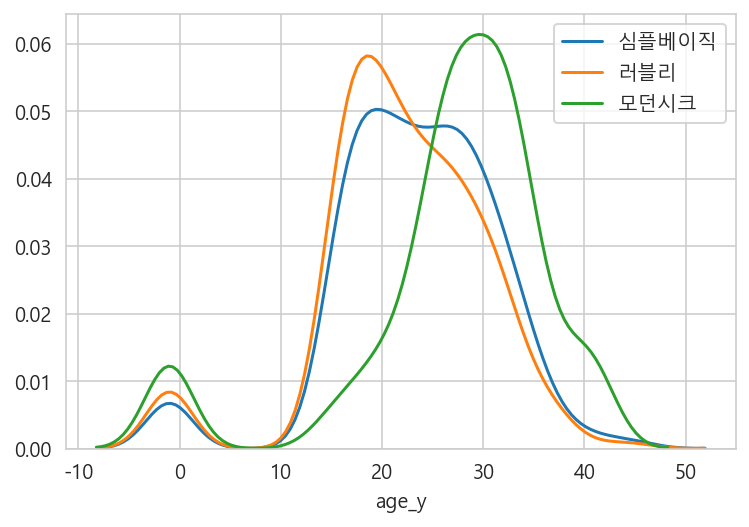

In [34]:
one = merged[merged['심플베이직'] == 1]
two = merged[merged['러블리'] == 1]
three = merged[merged['모던시크'] == 1]

sns.distplot(one['age_y'], hist = False, label = '심플베이직')
sns.distplot(two['age_y'], hist = False, label = '러블리')
sns.distplot(three['age_y'], hist = False, label = '모던시크')

**10. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꾸고, 그리고 user id를 보기 쉽게 간단한 자연수 형태로 변환**

In [35]:
query = "SELECT * FROM 'log'"

log = pd.read_sql(query, connect)

print(log.shape)
log = log.sort_values(by = 'user_id', ascending = True)
log.reset_index(drop = True)

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0
4,2018-06-11 01:11:03.608,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN
...,...,...,...,...,...,...
105810,2018-06-11 17:47:46.046,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,my_goods,app_page_view,NaN,NaN
105811,2018-06-11 17:22:14.192,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,goods_search_result/반팔티,enter_browser,3978.0,41.0
105812,2018-06-11 17:18:56.931,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,my_goods,app_page_view,NaN,NaN
105813,2018-06-11 17:08:54.064,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,goods_search_result/반팔티,app_page_view,NaN,NaN


In [36]:
# cursor = connect.cursor()
# cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# print(cursor.fetchall())

In [37]:
# 판다스의 unique() 기능을 이용하여 유저 아이디를 user_id라는 변수에 저장.

user_id = log['user_id'].unique()
user_id

array(['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot',
       '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv',
       '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', ...,
       'zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs',
       'zznj-LHhddVvuzZmbZpw6MSylLO64982',
       'zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV'], dtype=object)

In [38]:
n_user_id = []

for x in range(len(user_id)):
    n_user_id.append(x)


In [39]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶습니다.
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 아래 결과와 같이 zip object이 출력됩니다.
print(id_zip)

In [40]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]


[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [41]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)

id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

In [42]:
# data_logs, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.

# Write your code here! (3 lines)
log['n_user_id'] = log['user_id'].map(id_dict)
order['n_user_id'] = order['user_id'].map(id_dict)
user['n_user_id'] = user['user_id'].map(id_dict)
 

# 결과를 확인합니다.
log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
52042,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,0
52185,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,0
7571,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1
7589,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1
9391,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1


 **12. 주문 데이터, 로그데이터를 concat**

In [43]:
#주문 데이터의 첫번째 row를 출력합니다.
order.iloc[0]

timestamp                2018-06-11 00:00:43.032000
user_id            bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                       1414
shop_id                                          38
price                                         45000
timestamp(hour)                                   0
n_user_id                                      6185
Name: 0, dtype: object

In [44]:
log.loc[log['user_id'] == 'bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx']

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6185
5156,2018-06-11 00:37:22.757,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6185
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6185
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6185
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6185
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6185


In [1155]:
user_number_order = len(set(order['user_id']))
user_number_log = len(set(log['user_id']))
user_duplicated = set(order['user_id']) & set(log['user_id'])

print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


In [1156]:
print(order.columns)
print(log.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price',
       'timestamp(hour)', 'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [1157]:
order_copy = order.copy()
order_copy

,timestamp,user_id,goods_id,shop_id,price,timestamp(hour),n_user_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,6185.0
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,8818.0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,NaN
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,NaN
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,7763.0
...,...,...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000,23,7261.0
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900,23,802.0
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23,9407.0
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23,2739.0


In [1158]:
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]
order_copy['event_origin'] = order_copy['shop_id']
order_copy['event_name'] = 'purchase'
order_copy['event_goods_id'] = order_copy['goods_id']

order_copy['event_shop_id'] = np.nan

# 사용할 columns를 설정.
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'event_shop_id', 'price']]

order_copy.head()


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,event_shop_id,price
0,2018-06-11 00:00:43.032,6185.0,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,NaN,45000
1,2018-06-11 00:02:33.763,8818.0,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,NaN,9500
4,2018-06-11 00:05:26.010,7763.0,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,NaN,29000
5,2018-06-11 00:05:35.182,2721.0,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,NaN,11200
6,2018-06-11 00:06:14.314,7731.0,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,NaN,19800


In [1159]:
log['price'] = np.nan

log = log[['timestamp', 'n_user_id', 'user_id', 'event_origin', 'event_name', 'event_goods_id', 'event_shop_id', 'price']]
log


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,event_shop_id,price
52042,2018-06-11 15:57:10.615,0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,NaN
52185,2018-06-11 15:59:05.505,0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,NaN
7571,2018-06-11 00:55:37.309,1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,NaN
7589,2018-06-11 00:55:44.430,1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,NaN
9391,2018-06-11 01:11:03.608,1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
60471,2018-06-11 17:47:46.046,9908,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,my_goods,app_page_view,NaN,NaN,NaN
58416,2018-06-11 17:22:14.192,9908,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,goods_search_result/반팔티,enter_browser,3978.0,41.0,NaN
58201,2018-06-11 17:18:56.931,9908,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,my_goods,app_page_view,NaN,NaN,NaN
57491,2018-06-11 17:08:54.064,9908,zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV,goods_search_result/반팔티,app_page_view,NaN,NaN,NaN


In [1160]:
log_order = pd.concat([log, order_copy])

----

In [1161]:
log_order['purchase'] = log_order['price'].notnull()

log_order.head()

,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,event_shop_id,price,purchase
52042,2018-06-11 15:57:10.615,0.0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,NaN,False
52185,2018-06-11 15:59:05.505,0.0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,NaN,False
7571,2018-06-11 00:55:37.309,1.0,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,NaN,False
7589,2018-06-11 00:55:44.430,1.0,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,NaN,False
9391,2018-06-11 01:11:03.608,1.0,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,NaN,False


----

In [1162]:
log_order = log_order.sort_values(by = ['user_id', 'timestamp'], ascending = True)
log_order = log_order.reset_index(drop = True)
log_order = log_order[['event_goods_id', 'event_name', 'event_origin', 'event_shop_id', 'n_user_id', 'price', 'timestamp', 'user_id', 'purchase']]
log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1.0,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1.0,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1.0,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


**13. 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격을 구하기.**

고객별 연속한 log사이의 시간 간격을 log duration으로 정의합니다. 이는 고객의 잔존시간을 구하는 것으로 연결됩니다.

현재 제공된 데이터에서는 고객이 앱을 종료하는 기록이 없기 때문에 마지막 log의 log_duration은 0이라고 가정을 합니다.

In [1163]:
log_order['timestamp'] = pd.to_datetime(log_order['timestamp'])

----

In [1164]:
# timestamp_after 컬럼을 다음과 같이 만듭니다.
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after
0,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505
1,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT
2,NaN,app_page_view,my_goods,NaN,1.0,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430
3,2506.0,enter_browser,my_goods,40.0,1.0,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295
4,NaN,app_page_view,my_goods,NaN,1.0,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608


timestamp_after과 timestamp의 차이를 계산하여 log_duration을 구합니다.

----


In [1165]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.

log_order['log_duration'] = log_order['timestamp_after'] - log_order['timestamp']

log_order['log_duration'] = log_order['log_duration'].fillna(0)


log_order[['timestamp','timestamp_after','log_duration']].head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """


,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


----

In [1166]:
log_order['log_duration'] = log_order['log_duration'].dt.total_seconds().astype(float)

log_order[['n_user_id', 'timestamp', 'timestamp_after', 'log_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0.0,2018-06-11 15:59:05.505,NaT,0.000
2,1.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


**14. 고객이 한 번 앱에 들어와서 활동하는 시간인 잔존시간을 구하기 위해 cycle을 정의해주세요.**

고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 한 cycle이라 정의하겠습니다.

cycle을 구하기 위해서 고객이 cycle을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼을 만듭니다. is_out의 조건은 아래와 같이 2가지가 있습니다.

    조건 1) log_duration이 0이면 고객의 당일 마지막 log입니다.
    
    조건 2) log간 간격이 40분이상이면 고객이 한 cycle이 종료하고 다음 cycle로 돌아온 것이라고 하겠습니다.

따라서 위의 조건중 적어도 1개를 만족시키면 True되도록 is_out 컬럼을 생성. 





In [1167]:
# 40분을 초로 환산해야 합니다.

# print(40*60)

log_order['log_duration'] = log_order['log_duration'].astype(int)
log_order.loc[(log_order['log_duration'] > 2400) | (log_order['log_duration'] <= 0), 'is_out'] = True
log_order.loc[(log_order['is_out'] != True), 'is_out'] = False

log_order[['n_user_id', 'timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114,False
1,0.0,2018-06-11 15:59:05.505,NaT,0,True
2,1.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7,False
3,1.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288,False
4,1.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630,False


In [1168]:
log_order.loc[(log_order['is_out'] == True), 'log_duration'] = 0


log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114,False
1,0.0,2018-06-11 15:59:05.505,NaT,0,True
2,1.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7,False
3,1.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288,False
4,1.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630,False


----

In [1169]:
log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(5)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114,False,0
1,0.0,2018-06-11 15:59:05.505,NaT,0,True,0
2,1.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7,False,1
3,1.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288,False,1
4,1.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630,False,1


In [1170]:
log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# user마다 첫 cycle_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily
0,0.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114,False,0
1,0.0,2018-06-11 15:59:05.505,NaT,0,True,0
2,1.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7,False,0
3,1.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288,False,0
4,1.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630,False,0
5,1.0,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2,False,0
6,1.0,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63,False,0
7,1.0,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19,False,0
8,1.0,2018-06-11 01:12:28.850,NaT,0,True,0
9,2.0,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,0,True,0


**14.1) cycle별 log 수(접속별 활동 개수)**

In [1171]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )

cycle_log_count.head(15)

,n_user_id,cycle_idx_daily,log_count
0,0.0,0,2
1,1.0,0,7
2,2.0,0,1
3,2.0,1,6
4,2.0,2,7
5,2.0,3,4
6,2.0,4,2
7,2.0,5,11
8,2.0,6,17
9,3.0,0,1


**14.2) user별 cycle당 평균 log수의 평균(고객별 접속당 평균 활동수)**

In [1172]:
cycle_user_log_count = (cycle_log_count
                 .groupby(['n_user_id'])
                 .agg({'log_count':'mean'})
                 .reset_index() # index를 초기화합니다.
                 .rename(columns = { 'log_count' : "log_count_mean"} )
                       )


cycle_user_log_count.head()


,n_user_id,log_count_mean
0,0.0,2.000000
1,1.0,7.000000
2,2.0,6.857143
3,3.0,7.750000
4,4.0,2.000000


**14.3) 하루동안 가장 많은 cycle을 갖는(가장 많이 활동한) 상위 5명의 user를 구해주세요.**

`Hint) groupby(), nunique(), sort_values 메서드`

In [1173]:
cycle_user_log_count.sort_values(by = 'log_count_mean', ascending = False).head(5)

,n_user_id,log_count_mean
1123,1123.0,151.0
8100,8100.0,62.0
534,534.0,49.0
5713,5713.0,48.0
3689,3689.0,44.0


**15. 잔존시간을 구해주세요**

잔존시간이란 고객이 앱에서 머문 시간을 뜻합니다.



잔존 시간이 높다는 것은 사이트 운영의 청신호라고 생각할 수 있습니다. 일단 방문 목적과 랜딩페이지에서 제공되는 컨텐츠가 부합한다는 뜻이며, 웹사이트의 컨텐츠에 흥미를 느낀 방문자들이 계속 머물고 있다는 뜻이기도 합니다. 방문자들이 웹사이트에 오랜 시간 머물게 되면 웹사이트에서 제공하는 다양한 장치들을 접할 기회가 많아지고 전환에 도달할 확률이 더욱 높아지기 때문에 체류시간은 전환에 있어 매우 중요한 요소입니다.
광고를 고객을 통해 app으로의 유입을 성공해다면 그 다음 목표는 방문자를 계속 머물게 하여 전환으로 이어질 수 있도록 하는 것입니다.


두가지 기준으로 잔존시간을 구할 것입니다.

    1) user별
    2) 구매 user/ 비구매 user

**15.1) user별 잔존시간**



먼저 cycle별 잔존시간을 다음과 같이 구합니다.

In [1175]:
remaining_user_time_cycle = (remaining_time_cycle
                         .groupby('n_user_id')['remaining_time']
                         .mean()
                         .reset_index()
                         .set_index('n_user_id')
                         .rename(columns = {'remaining_time' : 'duration'})
                       )

remaining_time_cycle.head(10)


,n_user_id,cycle_idx_daily,remaining_time
0,0.0,0,114
1,1.0,0,1009
2,2.0,0,0
3,2.0,1,619
4,2.0,2,269
5,2.0,3,68
6,2.0,4,2
7,2.0,5,385
8,2.0,6,2499
9,3.0,0,0


잔존 시간이 0인 것들은 app에 들어와서 아무것도 안하고 나간 고객들입니다.

제외하고 계산할 수도 있습니다.

**15.2) 구매/비구매 cycle별 평균 잔존시간 구하기**

구매 기록이 있는 cycle은 잔존시간이 길 것이라고 예상할 수 있습니다. 이를 확인하기 위하여 구매/비구매 cycle별 평균 잔존시간을 구하겠습니다.

In [1176]:
# log_order[log_order['purchase'] == True]

log_order['cycle_purchase'] = (log_order['purchase']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'purchase', 'cycle_idx_unique', 'cycle_purchase']].head(5)

,n_user_id,timestamp,timestamp_after,log_duration,purchase,cycle_idx_unique,cycle_purchase
0,0.0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114,False,0,0
1,0.0,2018-06-11 15:59:05.505,NaT,0,False,0,0
2,1.0,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7,False,1,0
3,1.0,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288,False,1,0
4,1.0,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630,False,1,0


In [1177]:
indexing = log_order['cycle_purchase'].unique()

print(log_order.shape)

(106587, 15)


---

In [1178]:
data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]

data_purchase

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily,cycle_purchase
0,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505,114,False,0,0,0
1,NaN,app_page_view,shops_bookmark,NaN,0.0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT,0,True,0,0,0


---

In [1179]:
purchase_cycle = (data_purchase.groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'cycle_duration'})
                       )

purchase_cycle.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,0.0,0,114


In [1180]:
npurchase_cycle = (data_npurchase.groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'cycle_duration'})
                       )

npurchase_cycle.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,1.0,1,1009
1,2.0,2,0
2,2.0,3,619
3,2.0,4,269
4,2.0,5,68
5,2.0,6,2
6,2.0,7,385
7,2.0,8,2499
8,3.0,9,0
9,3.0,10,43


<Figure size 1296x432 with 0 Axes>

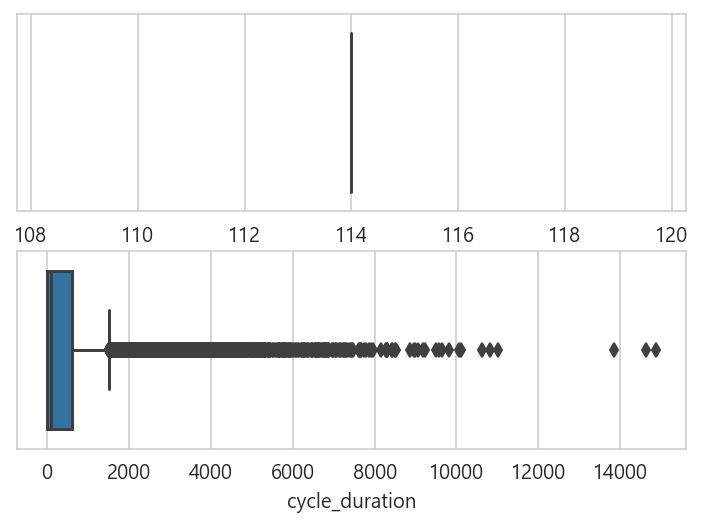

In [1182]:
plt.figure(figsize = (18, 6))
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

sns.boxplot(data=purchase_cycle, x = 'cycle_duration', ax = ax1)
sns.boxplot(data=npurchase_cycle, x = 'cycle_duration', ax = ax2)